# Project 4

### Team F
Chouliaras Andreas 2143<br>
Pappas Apostolos 2109

## Problem 1 - Decision Trees

In this exercise, we will build a decision tree from the dataset presented bellow. The dataset contains weather features such as Outlook, Temperature, Humidity and Wind. We will try to predict the PlayTennis output. 

| Day | Outlook | Temperature | Humidity | Wind | PlayTennis |  
| --- | --- | --- | --- | --- | --- |
| D1 | Sunny | Hot | High | Weak | No |
| D2 | Sunny | Hot | High | Strong | No |
| D3 | Overcast | Hot | High | Weak | Yes |
| D4 | Rain | Mild | High | Weak | Yes |
| D5 | Rain | Cool | High | Normal | Yes |
| D6 | Rain | Cool | Normal | Strong | No |
| D7 | Overcast | Cool | Normal | Strong | Yes |
| D8 | Sunny | Mild | High | Weak | No |
| D9 | Sunny | Cool | Normal | Weak | Yes |
| D10 | Rain | Mild | Normal | Weak | Yes |
| D11 | Sunny | Mild | Normal | Strong | Yes |
| D12 | Overcast | Mild | High | Strong | Yes |
| D13 | Overcast | Hot | Normal | Weak | Yes |
| D14 | Rain | Mild | High | Strong | No |

The decision tree will be built based on the \textbf{ID3} algorithm. \textbf{ID3} builds a decision tree from a fixed set of examples.The resulting tree is used to classify future samples. The example has several attributes and belongs to a class (like yes or no). The leaf nodes of the decision tree contain the class name whereas a non-leaf node is a decision node. The decision node is an attribute test with each branch (to another decision tree) being a possible value of the attribute. ID3 uses information gain to help it decide which attribute goes into a decision node. 

<img src="./graph.png" style="width: 600px;">

In general a Decision Tree has the following properties:
\begin{itemize}
\item Is a flow-chart-like tree structure
\item Internal node denotes a test in an attribute
\item Branch represents an outcome of the test above
\item Leaf nodes represent class labels or class distribution
\end{itemize}

OK, enough on the theory of things. How is the ID3 tree constructed? How does ID3 choose between several attributes?

ID3 algorithm can be summarized into two key statistical properties:
\begin{itemize}
\item \textbf{Gain}
\item \textbf{Entropy}
\end{itemize}

Gain, or information gain, measures how well a given attribute separates training examples into targeted classes. The one with the highest information gain is selected. Notice that information gain is most usefull for classification. But, in order to define gain, we first borrow another statistical property called entropy. Information entropy is the average rate at which information is produced by a stochastic source of data. In English, entropy measures the amount of information in an attribute. The formulas of both are shown below:

$$Entropy(S) = -\sum_{i}P_ilogP_i$$

where $P_i$ is a fraction of examples in a given class. It is important for one to notice that we talk about the whole dataset. On the other hand, gain is defined as:

$$Gain(S, A) = Entropy(S) - Entropy(S,A)$$

In general, an Entropy of 1 means that total randomness. On the other hand, an Entropy of 0 means perfect classification.

\textbf{1)} Firstly, let's compute the Entropy of PlayTennis. We have the following table:

|Yes|No|
|---|---|
|9|5|

Thus, the entropy is computed as 
$$Entropy(PlayTennis) = -P(Yes)log_2P(Yes)-P(No)log_2P(No) = -(\frac{9}{14})log_2(\frac{9}{14}) - (\frac{5}{14})log_2(\frac{5}{14}) = 0.94$$


What we have to do now, is to compute each feature's gain. We will compare these four gain values and select the maximum.

For the Outlook feature, we have the following table which is used in computing each feature's value entropy:

|PlayTennis|Sunny|Overcast|Rain|
|---|---|---|---|
|Yes|2|4|3|
|No|3|0|2|

$Entropy(Sunny) = -\frac{2}{5}log_2(\frac{2}{5}) - \frac{3}{5}log_2(\frac{3}{5}) = 0.97$

$Entropy(Overcast) = 1log_2(1) = 0$

$Entropy(Rain) = -\frac{3}{5}log_2(\frac{3}{5}) - \frac{2}{5}log_2(\frac{2}{5})$

$Gain(PlayTennis, Outlook) = Entropy(PlayTennis) - (\frac{5}{14})Entropy(Sunny) - (\frac{4}{14})Entropy(Overcast) - (\frac{5}{14})Entropy(Rain) =  0.246$

Continuing, we will compute the $Gain(PlayTennis, Temperature)$ value. As done before, we have:

|PlayTennis|Hot|Mild|Cool|
|---|---|---|---|
|Yes|2|4|3|
|No|2|2|1|

$Entropy(Hot) = -\frac{2}{4}log_2(\frac{2}{4}) - \frac{2}{4}log_2(\frac{2}{4}) = 1$

$Entropy(Mild) = -\frac{4}{6}log_2(\frac{4}{6}) - \frac{2}{6}log_2(\frac{2}{6}) = 0.9182$

$Entropy(Rain) = -\frac{3}{4}log_2(\frac{3}{4}) - \frac{1}{4}log_2(\frac{1}{4}) = 0.8112$

With such high Entropy values, we should expect a small gain value. We also expect that the Temperature feature won't have that much of a contribution in the final decision.

$Gain(PlayTennis, Temperature) = Entropy(PlayTennis) - (\frac{4}{14})Entropy(Hot) - (\frac{6}{14})Entropy(Mild) - (\frac{4}{14})Entropy(Cool) =  0.029$

We do the same for the Humidity feature which has only two possible values.

|PlayTennis|High|Normal|
|---|---|---|
|Yes|3|6|
|No|4|1|

$Entropy(High) = -\frac{3}{7}log_2(\frac{3}{7}) - \frac{4}{7}log_2(\frac{4}{7}) = 0.9852$

$Entropy(Normal) = -\frac{6}{7}log_2(\frac{6}{7}) - \frac{1}{7}log_2(\frac{1}{7}) = 0.5916$

$Gain(PlayTennis, Humidity) = Entropy(PlayTennis) - (\frac{7}{14})Entropy(High) - (\frac{7}{14})Entropy(Normal) = 0.1516$

Finally, for the Wind feature, we get:

|PlayTennis|Weak|Strong|
|---|---|---|
|Yes|6|3|
|No|2|3|

$Entropy(Weak) = -\frac{6}{8}log_2(\frac{6}{8}) - \frac{2}{8}log_2(\frac{2}{8}) = 0.8112$

$Entropy(Strong) = -\frac{3}{6}log_2(\frac{3}{6}) - \frac{3}{6}log_2(\frac{3}{6}) = 1$

$Gain(PlayTennis, Wind) = Entropy(PlayTennis) - (\frac{7}{14})Entropy(Weak) - (\frac{7}{14})Entropy(Strong) = 0.0478$

Having got our first "draft", we see that Outlook has the highest Gain value. Thus, we will use Outlook as our first node/root. We also notice that "Overcast" value leads to a certain decision. This will be our first leaf.

<img src="./root.png" style="width: 600px;">

We will do the same work for our "Sunny" branch. We will calculate Entropy and Gain values for each feature and select the one with the maximum Gain.

First, we calculate the Entropy value for "Sunny" as follows:

$Entropy(Sunny) = -\frac{2}{5}log_2(\frac{2}{5}) - \frac{3}{5}log_2(\frac{3}{5}) = 0.971$

We then compute the gain value for each feature starting with Humidity.

|PlayTennis given Sunny|High|Normal|
|---|---|---|
|Yes|0|2|
|No|3|0|

$Entropy(High) = -\frac{0}{3}log_2(\frac{6}{8}) - \frac{3}{3}log_2(\frac{3}{3}) = 0$

$Entropy(Normal) = -\frac{2}{2}log_2(\frac{2}{2}) - \frac{0}{0}log_2(\frac{0}{0}) = 0$

$Gain(Sunny, Humidity) = Entropy(Sunny) - (\frac{3}{5})Entropy(High) - (\frac{2}{5})Entropy(Normal) = 0.971$

It seems that we have a strong candidate here!
Next, we examine the Temperature feature in the same manner.

|PlayTennis given Sunny|Hot|Mild|Cool|
|---|---|---|---|
|Yes|2|1|1|
|No|0|1|0|

$Entropy(Hot) = -\frac{2}{2}log_2(\frac{2}{2}) - \frac{0}{2}log_2(\frac{0}{2}) = 0$

$Entropy(Normal) = -\frac{1}{2}log_2(\frac{1}{2}) - \frac{1}{2}log_2(\frac{1}{2}) = 1$

$Entropy(Cool) = 0$

$Gain(Sunny, Temperature) = Entropy(Sunny) - (\frac{2}{5})Entropy(Hot) - (\frac{2}{5})Entropy(Mild) - (\frac{1}{5})Entropy(Cool) = 0.571$

Finally, for the Wind feature:

|PlayTennis given Sunny|Weak|Strong|
|---|---|---|
|Yes|1|1|
|No|2|1|

$Entropy(Weak) = -\frac{1}{3}log_2(\frac{1}{3}) - \frac{2}{3}log_2(\frac{2}{3}) = 0$

$Entropy(Strong) = -\frac{1}{2}log_2(\frac{1}{2}) - \frac{1}{2}log_2(\frac{1}{2}) = 1$

$Gain(Sunny, Wind) = Entropy(Sunny) - (\frac{3}{5})Entropy(Weak) - (\frac{2}{5})Entropy(Strong) = 0.02$

Seeing that the Humidity feature has the highest Gain value, we choose it as a new node in our tree. We repeat the same proccess for the "Rain" branch as follows.

Firstly, we will compute the Entropy of "Rain" and then examine the Wind feature:

$Entropy(Rain) = -\frac{3}{5}log_2(\frac{3}{5}) - \frac{2}{5}log_2(\frac{2}{5}) = 0.971$

|PlayTennis given Rain|Weak|Strong|
|---|---|---|
|Yes|3|0|
|No|0|2|

$Entropy(Weak) = -\frac{3}{3}log_2(\frac{3}{3}) - 0 = 0$

Weak might give us a certain "Yes" decision.

$Entropy(Strong) = 0$

Strong might give us a certain "No" decision.

$Gain(Sunny, Wind) = Entropy(Rain) - (\frac{3}{5})Entropy(Weak) - (\frac{2}{5})Entropy(Strong) = 0.971$

Then, we do the same for the Temperature feature:

|PlayTennis given Rain|Hot|Mild|Cool|
|---|---|---|---|
|Yes|0|2|1|
|No|0|1|1|

$Entropy(Mild) = -\frac{2}{3}log_2(\frac{2}{3}) - \frac{1}{3}log_2(\frac{1}{3}) = 0.9182$

$Entropy(Cool) = -\frac{1}{2}log_2(\frac{1}{2}) - \frac{1}{2}log_2(\frac{1}{2}) = 1$

$Gain(Rain, Temperature) = Entropy(Rain) - (\frac{3}{5})Entropy(Mild) - (\frac{2}{5})Entropy(Cool) = 0.02$

Thus, having the maximum Gain value, Wind becomes our next node. Our tree then becomes:

<img src="./final_tree.png" style="width: 600px;">

\textbf{2)} The reason why \textbf{Temperature} was not included in our original decision tree is the very low information gain it produced. 

What if we could form a training set where \textbf{Temperature} would have high Gain value? 

Such a training set can be seen below. Note that we eliminated the instances of data that lowered the total Temperature information gain.

| Day | Outlook | Temperature | Humidity | Wind | PlayTennis |  
| --- | --- | --- | --- | --- | --- |
| D1 | Sunny | Hot | High | Weak | No |
| D2 | Sunny | Hot | High | Strong | No |
| D4 | Rain | Mild | High | Weak | Yes |
| D5 | Rain | Cool | High | Normal | Yes |
| D7 | Overcast | Cool | Normal | Strong | Yes |
| D9 | Sunny | Cool | Normal | Weak | Yes |
| D10 | Rain | Mild | Normal | Weak | Yes |
| D11 | Sunny | Mild | Normal | Strong | Yes |
| D12 | Overcast | Mild | High | Strong | Yes |

This training set leads to an extreme decision tree using only the Temperature feature. To do things more interesting, we will add \textbf{D14}. Now, our decision tree will be the following: 

<img src="./tree_with_temp.png" style="width: 600px;">


\textbf{3)} Now, we will use the examples from D1 to D7 in order to construct our tree. We will use the rest for testing purposes. Our training dataset is the following:

| Day | Outlook | Temperature | Humidity | Wind | PlayTennis |  
| --- | --- | --- | --- | --- | --- |
| D1 | Sunny | Hot | High | Weak | No |
| D2 | Sunny | Hot | High | Strong | No |
| D3 | Overcast | Hot | High | Weak | Yes |
| D4 | Rain | Mild | High | Weak | Yes |
| D5 | Rain | Cool | High | Normal | Yes |
| D6 | Rain | Cool | Normal | Strong | No |
| D7 | Overcast | Cool | Normal | Strong | Yes |

We begin by calculating the Entropy for the whole dataset:

$$Entropy(PlayTennis) = -P(Yes)log_2P(Yes)-P(No)log_2P(No) = -(\frac{4}{7})log_2(\frac{4}{7}) - (\frac{3}{7})log_2(\frac{3}{7}) = 0.985$$

Following the same procedure as in \textbf{1)}, we examine the Gain value of each feature as follows.
For the \textbf{Outlook} feature, we get:

|PlayTennis|Sunny|Overcast|Rain|
|---|---|---|---|
|Yes|0|2|2|
|No|2|0|1|


$Entropy(Sunny) = -\frac{2}{2}log_2(\frac{2}{2})  = 0$

$Entropy(Overcast) = -\frac{2}{2}log_2(\frac{2}{2}) = 0$

$Entropy(Rain) = -\frac{2}{3}log_2(\frac{2}{3}) - \frac{1}{3}log_2(\frac{1}{3}) = 0.918$

$Gain(PlayTennis, Outlook) = Entropy(PlayTennis) - (\frac{2}{7})Entropy(Sunny) - (\frac{2}{7})Entropy(Overcast) - (\frac{3}{7})Entropy(Rain) =  0.592$

The same is done for \textbf{Temperature}:

|PlayTennis|Hot|Mild|Cool|
|---|---|---|---|
|Yes|1|1|2|
|No|2|0|1|

$Entropy(Hot) = -\frac{1}{3}log_2(\frac{1}{3}) -\frac{2}{3}log_2(\frac{2}{3}) = 0.918$

$Entropy(Mild) = 0$

$Entropy(Cool) = -\frac{2}{3}log_2(\frac{2}{3}) - \frac{1}{3}log_2(\frac{1}{3}) = 0.918$

$Gain(PlayTennis, Outlook) = Entropy(PlayTennis) - (\frac{3}{7})Entropy(Hot) - (\frac{1}{7})Entropy(Mild) - (\frac{3}{7})Entropy(Cool) =  0.198$

Now, for the \textbf{Humidity} factor:

|PlayTennis|High|Normal|
|---|---|---|
|Yes|2|2|
|No|2|1|

$Entropy(High) = -\frac{2}{4}log_2(\frac{2}{4}) -\frac{2}{4}log_2(\frac{2}{4}) = 1$

$Entropy(Normal) = -\frac{2}{3}log_2(\frac{2}{3}) -\frac{1}{3}log_2(\frac{1}{3}) = 0,918$

$Gain(PlayTennis, Outlook) = Entropy(PlayTennis) - (\frac{4}{7})Entropy(High) - (\frac{3}{7})Entropy(Normal) =  0.02$

Finally, for the \textbf{Wind}:

|PlayTennis|Weak|Strong|
|---|---|---|
|Yes|3|1|
|No|1|2|

$Entropy(Weak) = -\frac{3}{4}log_2(\frac{3}{4}) -\frac{1}{4}log_2(\frac{1}{4}) = 0.811$

$Entropy(Strong) = -\frac{1}{3}log_2(\frac{1}{3}) -\frac{2}{3}log_2(\frac{2}{3}) = 0,918$

$Gain(PlayTennis, Outlook) = Entropy(PlayTennis) - (\frac{4}{7})Entropy(Weak) - (\frac{3}{7})Entropy(Strong) =  0.128$

Comparing the Gain values of each feature, we conclude that, since \textbf{Outlook} has the highest value, it should become the root of our tree. Interestingly enough, we see that for "Sunny" and "Overcast" values, we get zero Entropy. These two will be our first leaves for "No" and "Yes" respectively. Our tree is shaping as shown below:

<img src="./tree3.png" style="width: 600px;">

We now have to examine the "Rain" branch. We will firstly calculate its Entropy value and then compute the Gain values for \textbf{Temperature}, \textbf{Humidity} and \textbf{Wind}.

$$Entropy(Rain) = -\frac{2}{3}log_2(\frac{2}{3}) -\frac{1}{3}log_2(\frac{1}{3}) = 0,918$$

For \textbf{Temperature} we have:

|PlayTennis Given Rain|Mild|Cool|
|---|---|---|
|Yes|1|1|
|No|0|1|

$Entropy(Mild) = 0$

$Entropy(Cool) = -\frac{1}{2}log_2(\frac{1}{2}) -\frac{1}{2}log_2(\frac{1}{2}) = 1$

$Gain(PlayTennis, Outlook) = Entropy(Rain) - (\frac{1}{3})Entropy(Mild) - (\frac{2}{3})Entropy(Cool) =  0.251$

For \textbf{Humidity} we have:

|PlayTennis Given Rain|High|Normal|
|---|---|---|
|Yes|1|1|
|No|0|1|

$Entropy(High) = 0$

$Entropy(Normal) = -\frac{1}{2}log_2(\frac{1}{2}) -\frac{1}{2}log_2(\frac{1}{2}) = 1$

$Gain(PlayTennis, Outlook) = Entropy(Rain) - (\frac{1}{3})Entropy(Mild) - (\frac{2}{3})Entropy(Cool) =  0.251$

For \textbf{Wind} we have:

|PlayTennis Given Rain|Weak|Strong|
|---|---|---|
|Yes|2|0|
|No|0|1|

$Entropy(Weak) = 0$

$Entropy(Strong) = 0$

$Gain(PlayTennis, Outlook) = Entropy(Rain) = 0.918$

So, the next node of our tree will be a decision on \textbf{Wind}. Our leaves will be "Weak" and "Strong" with "Yes" and "No" values respectively.

<img src="./3tree_final.png" style="width: 600px;">

We will test our algorithm using the following dataset.

| Day | Outlook | Temperature | Humidity | Wind | PlayTennis |  
| --- | --- | --- | --- | --- | --- |
| D8 | Sunny | Mild | High | Weak | No |
| D9 | Sunny | Cool | Normal | Weak | Yes |
| D10 | Rain | Mild | Normal | Weak | Yes |
| D11 | Sunny | Mild | Normal | Strong | Yes |
| D12 | Overcast | Mild | High | Strong | Yes |
| D13 | Overcast | Hot | Normal | Weak | Yes |
| D14 | Rain | Mild | High | Strong | No |

What we expect for our model is to fail, since it has overfitted on the very few training data. The confusion matrix produced is the following.

|PlayTennis|True Yes |True No| 
| --- | --- | --- | 
| **Predicted Yes** | 3 | 0 |
| **Predicted No** | 2 | 2 |

The accuracy of our model is at $71.43\%$. The reason why this happens can be spotted on the difference between this and the previous model. The "Sunny" branch is pruned, thus leading to more false predictions.

\textbf{4)} We saw that our model is a bit overfitted on its training data and does not perform that well on the testing data. Thus, we would like to have a general pruning rule in order to reduce our overfitting and generalize our model.

Such a pruning algorithm can be the following. Starting from the second level of our decision tree, we examine each node's contribution to the total accuracy by removing one at a time and testing with our validation set. We place a leaf in the place of a node and check whether the accuracy rises or not. If it rises, we prune the entire subtree of the particular node. If the accuracy drops, we repeat the same procedure for the next level of nodes.

This strategy can be seen as a modification of the cross-validation technique. In our produced tree, this strategy will not work due to its small size. The only node that could be pruned is the Wind node. Pruning this node leads to worse accuracy.

Another simple and popular pruning strategy is the so-called \textbf{Reduced Error Pruning}. Starting at the leaves, each node is replaced with its most popular class. If the prediction accuracy is not affected then the change is kept. While somewhat naive, reduced error pruning has the advantage of simplicity and speed.

### Problem 2 - Neural Networks

For the needs of this exercise, we will use the following single neuron perceptron. What it actually does is to calculate the weighted sum of inputs which is expressed by $W^T + b$. Then, an activation function is applied. That activation function will define the final output of our neuron, which can be used as an input for the next neuron. Since we are working with a single neuron, the output of the activation function is, also, the output of our neuron. The activation function used in our case is the so-called \textbf{Hardlim} which is described below:

$$hardlim(a) = 
     \begin{cases}
       \text{1} &\quad\text{if a > 0}\\
       \text{0} &\quad\text{otherwise.} \\ 
     \end{cases}
$$

Thus our neuron is the following:

<img src="./perceptron.png" style="width: 400px;">

As we see, in our case, $b = -0.5$.

\textbf{1)} For our first instance, we have $W_1 = 0.1$ and $W_2 = 0.3$ as our weights. The input vector is $\begin{bmatrix}0\\0\end{bmatrix}$. This leads us to:

$$Y_1 = F(w^Tx_1 - 0.5) = F(-0.5) = 0$$

The error is now zero, so the weights are not updated. Following, our input vector becomes $\begin{bmatrix}0\\1\end{bmatrix}$. Applying the hardlim activation function over $w^t \mathbf{x_2} - 0.5$, we have:

$$Y_2 = F(w^Tx_2 - 0.5) = F(0 + 0.3 - 0.5) = F(-0.2) = 0$$

We see that our algorithm has produced a non-valid output. The error of our output is: $Z_2 - Y_2 = 1 - 0 = 1$. Thus, the weights have to be updated as follows:

$$w_2^{'} = w_2 + \eta*(Z_2 - Y_2) = 0.3 + 0.2 = 0.5$$



| $X_1$ | $X_2$ | $W_1$ | $W_2$ | Z | Y | Error | $W_1$ | $W_2$ | 
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| \textbf{Iteration 1} |
| 0 | 0 | 0.1 | 0.3 | 0 | 0 | 0 | 0.1| 0.3|
| 0 | 1 | 0.1 | 0.3 | 1 | 0 | 1 | 0.1| 0.5|
| 1 | 0 | 0.1 | 0.5 | 1 | 0 | 1 | 0.3| 0.5|
| 1 | 1 | 0.3 | 0.5 | 1 | 1 | 0 | 0.3| 0.5|
| \textbf{Iteration 2} |
| 0 | 0 | 0.3 | 0.5 | 0 | 0 | 0 | 0.3| 0.5|
| 0 | 1 | 0.3 | 0.5 | 1 | 1 | 0 | 0.3| 0.7|
| 1 | 0 | 0.3 | 0.7 | 1 | 0 | 1 | 0.5| 0.7|
| 1 | 1 | 0.5 | 0.7 | 1 | 1 | 0 | 0.5| 0.7|
| \textbf{Iteration 3} |
| 0 | 0 | 0.5 | 0.7 | 0 | 0 | 0 | 0.5| 0.7|
| 0 | 1 | 0.5 | 0.7 | 1 | 1 | 0 | 0.5| 0.9|
| 1 | 0 | 0.5 | 0.9 | 1 | 0 | 1 | 0.7| 0.9|
| 1 | 1 | 0.7 | 0.9 | 1 | 1 | 0 | 0.7| 0.9|
| \textbf{Iteration 4} |
| 0 | 0 | 0.7 | 0.9 | 0 | 0 | 0 | 0.7| 0.9|
| 1 | 1 | 0.7 | 0.9 | 1 | 1 | 0 | 0.7| 0.9|
| 1 | 0 | 0.7 | 0.9 | 1 | 1 | 0 | 0.7| 0.9|
| 1 | 1 | 0.7 | 0.9 | 1 | 1 | 0 | 0.7| 0.9|

__2)__ We define the squared error function, $E(W)$ as:

$$
E=(Z-Y(w_1,w_2))^2  \text{ where } Y(w_1,w_2)=
\begin{cases}
       \text{1} &\quad\text{if } w_1x_1+w_2x_2-0.5 > 0\\
       \text{0} &\quad\text{otherwise.} \\ 
\end{cases}     
$$
For the minimum squared error weight update rule:
$$
W^{new}= W^{old} - η \nabla  E(W)
$$
We need to derive $ \nabla E(W)$ which is:
$$
\nabla E(W_i)=-2(Z-Y(W_i))X_i
$$
So the weight update rule becomes:
$$
W^{new}= W^{old} + 2η(Z-Y(W_i))X_i
$$

Below we see the same example executed with this new weight update rule:

| $X_1$ | $X_2$ | $W_1$ | $W_2$ | Z | Y | Error | $W_1$ | $W_2$ | 
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| \textbf{Iteration 1} |
| 0 | 0 | 0.1 | 0.3 | 0 | 0 | 0 | 0.1| 0.3|
| 0 | 1 | 0.1 | 0.3 | 1 | 0 | 1 | 0.1| 0.7|
| 1 | 0 | 0.1 | 0.7 | 1 | 0 | 1 | 0.5| 0.7|
| 1 | 1 | 0.5 | 0.7 | 1 | 1 | 0 | 0.5| 0.7|
| \textbf{Iteration 2} |
| 0 | 0 | 0.5 | 0.7 | 0 | 0 | 0 | 0.5| 0.7|
| 0 | 1 | 0.5 | 0.7 | 1 | 1 | 0 | 0.5| 0.7|
| 1 | 0 | 0.5 | 0.7 | 1 | 0 | 1 | 0.9| 0.7|
| 1 | 1 | 0.9 | 0.7 | 1 | 1 | 0 | 0.9| 0.7|
| \textbf{Iteration 3} |
| 0 | 0 | 0.9 | 0.7 | 0 | 0 | 0 | 0.9| 0.7|
| 1 | 1 | 0.9 | 0.7 | 1 | 1 | 0 | 0.9| 0.7|
| 1 | 0 | 0.9 | 0.7 | 1 | 1 | 0 | 0.9| 0.7|
| 1 | 1 | 0.9 | 0.7 | 1 | 1 | 0 | 0.9| 0.7|

Converged.

__3)__ In the case we put an additional example, like X1 = 1, X2 = 1, Z = 0, the problem stops being linearly seperable.

The perceptron is a linear classifier, therefore it will never get to the state with all the input vectors classified correctly if the training set is not linearly separable.

In that case, no "approximate" solution will be gradually approached under the standard learning algorithm, but instead learning will fail completely and it will never converge.

### Problem 3 - Naive Bayes and KNN

In this assignment we will build classifiers that should distinguish between valid email messages and spam. We will represent each message as a bag of words.

What is a bag of words?

\textbf{Bag of words} is one of the simplest methods of embedding words into numerical vectors.Let’s consider the following documents:

    \textbf{Document 1:} High Five!
    \textbf{Document 2:} I am old.
    \textbf{Document 3:} She is five.

The vocabulary we obtain from this set of documents is (High, five, I, am, old, she, is). We will ignore punctuation for now, although depending on our use case it can also make a lot of sense to incorporate them into our vocabulary.

Below lies a matrix representing the relationship between each term from our vocabulary and the document. Each element in the matrix represents how many times that term appears in that particular document.

| Words | Document 1 | Document 2 | Document 3 |
| --- | --- | --- | --- |
| \textbf{High}  | 1 | 0 | 0 |
| \textbf{Five} | 1 | 0 | 1 |
| \textbf{I} | 0 | 1 | 0 | 
| \textbf{am} | 0 | 1 | 0 |
| \textbf{old} | 0 | 1 | 0 |
| \textbf{She} | 0 | 0 | 1 |
| \textbf{is} | 0 | 0 | 1 |

Using this matrix, we can obtain the vectors for each word as well as document. We can vectorize “five” as [1,0,1] and “Document 2” as [0,0,1,1,1,0,0].

The first step in our implementation is the preprossesing of our data.
We get our data from the emailspam folder and we devide the subject section from the email body section.

In [2]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from autocorrect import spell
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
import re
import os
import nltk

In [11]:
i = 0
labels = []
msg = []
sbj = []
for filename in os.listdir('emailspam/train/'):
    path = "emailspam/train/" + str(filename)    
    message = ""
    subject = ""
    for line in open(path):
        if("Subject" in line):
            subject = line
        else:
            message = message + line
    
    sbj.append(subject.replace("Subject:", "").replace("\n", ""))
    msg.append(message.replace("\n", " "))
    #print(str([line.rstrip() for line in open(path)]))
    if("sp" in filename):
        labels.append(1)
    else:
        labels.append(0)

data = {'labels':labels, 'subject': sbj, 'messages':msg}
df = pd.DataFrame(data = data)

df['labels'].value_counts()

0    301
1    300
Name: labels, dtype: int64

We use the dataset to create the word clouds for both spam and normal emails.

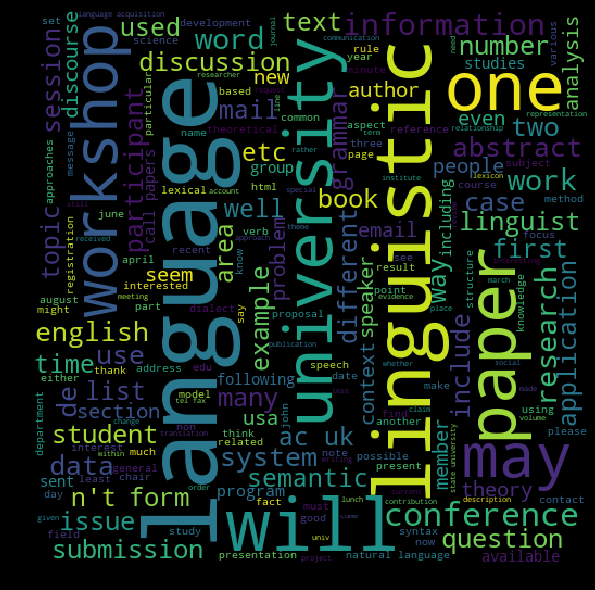

In [12]:
spam_words = ' '.join(list(df[df['labels'] == 0]['messages']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

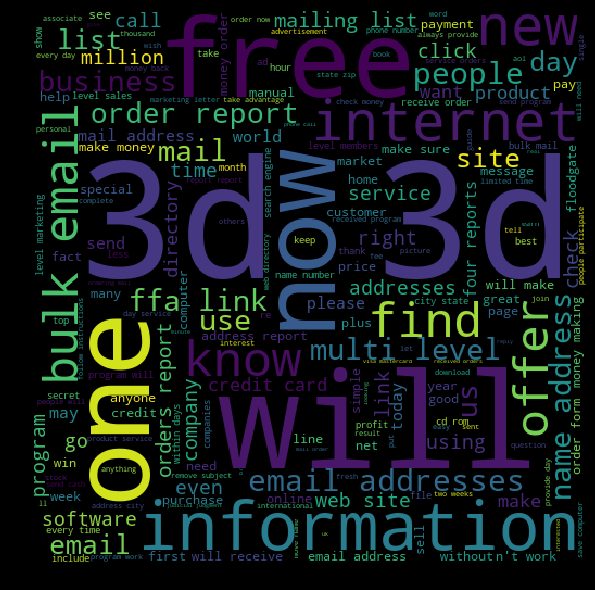

In [13]:
spam_words = ' '.join(list(df[df['labels'] == 1]['messages']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [14]:
def process_message(message, lower_case = True, stem = True, stop_words = True, gram = 1):
    import re
    message = re.sub('[^A-Za-z]', ' ', message)
    message = message.lower()
    words = word_tokenize(message)
    words = [w for w in words if len(w) > 2]
    if gram > 1:
        w = []
        for i in range(len(words) - gram + 1):
            w += [' '.join(words[i:i + gram])]
        return w
    if stop_words:
        sw = stopwords.words('english')
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(spell(word)) for word in words] 
    words=" ".join(words)
    return words

We used the above function function to clean the texts of any non alphabetical characters.

The Preprocessing notebook shows this part of the implementation.

At this point we expected it to be rather troublesome to repeat this whole process for every question so on.<br>
So we saved the dataframes for both training and test datasets to csv files that are more lightweight and faster to work with.

This is how we load our data from so on.

__Problem 3 - Naive Bayes__

We import the datasets we created earlier from the emailspam folder, as well as the libraries we will use:

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import pandas as pd
import numpy as np
from collections import defaultdict
from collections import OrderedDict
from collections import Counter
import re

In [16]:
df=pd.read_csv('train.csv')
df.head(10)

,labels,subject,messages
0,0,NaN,date sun dec est michael mor york subject quer...
1,0,NaN,discuss remind year ago read sourc forgotten c...
2,0,NaN,much restrict pro quit restrict
3,0,gent confer,listserv intern confer second circular februar...
4,0,queri caus korean,could anyon point book articl cau construct ko...
5,0,learn cultur empathi,gradual student educ approach colleagu mine qu...
6,0,psycholinguist teach,undergrad cour shortli teach psycholinguist wo...
7,0,german corpora,look line corpora modern german inform would a...
8,0,NaN,help design expert mandarin tone part phonolog...
9,0,job univers utah,linguist program univ utah invit appli one yea...


In [17]:
train_data=df['messages']
train_labels = df.iloc[:, 0]
print ("Total Number of Training Examples: ",len(train_data))
print ("Total Number of Training Labels: ",len(train_labels))

Total Number of Training Examples:  601
Total Number of Training Labels:  601


In [18]:
validate=pd.read_csv('test.csv')
validate.head(10)

,labels,subject,messages
0,0,rel marker time,work histori rel marker spoken languag onward ...
1,0,acquisit reflex verb,enquiri behalf student anyon provid refer conc...
2,0,becom linguist,theori linguist attract mani field rang human ...
3,0,syntax textbook summari,week ago ask reader share experi cowper haegem...
4,0,citat,resist put tuppenc worth chomski citat record ...
5,0,chomski citat mandevil paradox,fabl bee privat vice public benefit bernard ma...
6,0,citat,linguist agre oscar wild thing wors talk talk
7,0,zelig harri,zelig harri die sleep home new york friday may...
8,0,innat,time leap side fenc chang innat signific lingu...
9,0,axiomat linguist,jame dicken extend axiomat linguist xii page c...


In [19]:
test_data =validate['messages'].values.astype('U')
test_labels = validate.iloc[:, 0]
print ("Number of Test Examples: ",len(test_data))
print ("Number of Test Labels: ",len(test_labels))

Number of Test Examples:  201
Number of Test Labels:  201


We made a single Naive Bayes class with elements for all the questions below and we just enable the features we need for every one.

During the training phase we construct a bag of words for each class and precalculate the elements that remain the same during every testing. These elements are: <br>
a dictionary of the bag of words for each class.<br>
prior probability for each class and denominator value ,from the bayesian theorem formula<br>

In [20]:
class NaiveBayes:   
    def __init__(self,unique_classes):
        self.classes=unique_classes # Constructor is sinply passed with unique number of classes of the training set
        
    def addToBow(self,example,dict_index):
        if isinstance(example,np.ndarray): example=example[0]    
        for token_word in example.split(): #for every word in preprocessed example
            self.bow_dicts[dict_index][token_word]+=1 #increment in its count
            
    def top_feature_vals(self,all_cat_examples,cat,n=10,l=25):
        vec = CountVectorizer().fit(all_cat_examples)
        bag_of_words = vec.transform(all_cat_examples)
        #print(bag_of_words.shape)
        sum_words = bag_of_words.sum(axis=0)
        #print(sum_words.shape)

        words_freq = [(word, sum_words[0, idx],idx) for word, idx in     vec.vocabulary_.items()]
        words_freq=sorted(words_freq, key = lambda x: x[1], reverse=True)

        idx=[]
        for i in range(n):
            if(words_freq[i][1] >= l):
                idx.append(words_freq[i][2])
        Bow=[]
        bag_of_words=bag_of_words.toarray()
        Bow = (bag_of_words[:, idx])
        #print(Bow.shape)
        selector = SelectKBest(mutual_info_classif, k=n)
        selectedFeatures = selector.fit_transform(Bow, self.labels[self.labels==cat])
        print("Class",cat,"bag of words shape: ",selectedFeatures.shape)
        sum_idx = selectedFeatures.sum(axis=0)
        
        return(sum_idx)
    
    def train(self,dataset,labels,n=10,p=10,l=25,d=0):
        self.examples=dataset
        self.labels=labels
        self.bow_dicts=np.array([defaultdict(lambda:0) for index in range(self.classes.shape[0])])
        self.temp=np.array([defaultdict(lambda:0) for index in range(self.classes.shape[0])])
        
        #only convert to numpy arrays if initially not passed as numpy arrays - else its a useless recomputation       
        if not isinstance(self.examples,np.ndarray): self.examples=np.array(self.examples)
        if not isinstance(self.labels,np.ndarray): self.labels=np.array(self.labels)
            
        #constructing BoW for each category
        for cat_index,cat in enumerate(self.classes):         
            all_cat_examples=self.examples[self.labels==cat] #filter all examples of category == cat
            
            cleaned_examples=pd.DataFrame(data=all_cat_examples)
            
            #now costruct BoW of this particular category
            np.apply_along_axis(self.addToBow,1,cleaned_examples,cat_index)
            
            #=================== D=1 ======================
            if (d==1):
                self.bow_dicts[cat_index] = OrderedDict(sorted(self.bow_dicts[cat_index].items(), key=lambda item: item[1], reverse=True))
                sum_idx = self.top_feature_vals(all_cat_examples,cat, n=n,l=l)
                i=0
                for k, v in self.bow_dicts[cat_index].items():
                    if (v == sum_idx[i]):
                        self.temp[cat_index][k]=v
                        i=i+1
                        if(i==len(sum_idx)):
                            break

                self.bow_dicts[cat_index] = self.temp[cat_index]
        if (d==1):    
            print("Top", p ,"most predictive words by info gain: ")
            result = {key: self.bow_dicts[0].get(key, 0) + self.bow_dicts[1].get(key, 0) 
                      for key in set(self.bow_dicts[0]) | set(self.bow_dicts[1])}
            result = OrderedDict(sorted(result.items(), key=lambda item: item[1], reverse=True))
            result = Counter(result).most_common(p)
            print(result)
        
        prob_classes=np.empty(self.classes.shape[0])
        all_words=[]
        cat_word_counts=np.empty(self.classes.shape[0])
        for cat_index,cat in enumerate(self.classes):
           
            #Calculating prior probability p(c) for each class
            prob_classes[cat_index]=np.sum(self.labels==cat)/float(self.labels.shape[0]) 
            
            #Calculating total counts of all the words of each class 
            count=list(self.bow_dicts[cat_index].values())
            cat_word_counts[cat_index]=np.sum(np.array(list(self.bow_dicts[cat_index].values())))+1
            
            #get all words of this category                                
            all_words+=self.bow_dicts[cat_index].keys()
            
        #combine all words of every category & make them unique to get vocabulary -V- of entire training set
        self.vocab=np.unique(np.array(all_words))
        self.vocab_length=self.vocab.shape[0]
                                  
        #computing denominator value                                      
        denoms=np.array([cat_word_counts[cat_index]+self.vocab_length+1 for cat_index,cat in enumerate(self.classes)])
      
        #    Now that we have everything precomputed as well, its better to organize everything in a tuple 
        #    rather than to have a separate list for every thing.
        #    
        #    Every element of self.cats_info has a tuple of values
        #    Each tuple has a dict at index 0, prior probability at index 1, denominator value at index 2
        
        self.cats_info=[(self.bow_dicts[cat_index],prob_classes[cat_index],denoms[cat_index]) for cat_index,cat in enumerate(self.classes)]
        self.cats_info=np.array(self.cats_info)                                 
      
    def getExampleProbs(self,test_example):                                
        #For a single test example estimates it's posterior probabilities with respect to each class 
        likelihood_prob=np.zeros(self.classes.shape[0]) #to store probability w.r.t each class
        
        #finding probability w.r.t each class of the given test example
        for cat_index,cat in enumerate(self.classes):                  
            for test_token in test_example.split(): #split the test example and get p of each test word
                #get total count of this test token from it's respective training dict to get numerator value
                test_token_counts=self.cats_info[cat_index][0].get(test_token,0)+1
                
                #now get likelihood of this test_token word                              
                test_token_prob=test_token_counts/float(self.cats_info[cat_index][2]) 
                
                #remember why taking log? To prevent underflow!
                likelihood_prob[cat_index]+=np.log(test_token_prob)
                                              
        # we have likelihood estimate of the given example against every class but we need posterior probility
        post_prob=np.empty(self.classes.shape[0])
        for cat_index,cat in enumerate(self.classes):
            post_prob[cat_index]=likelihood_prob[cat_index]+np.log(self.cats_info[cat_index][1])
        return post_prob
   
    def test(self,test_set):           
        predictions=[] #to store prediction of each test example
        for cleaned_example in test_set:                                        
            #preprocess the test example the same way we did for training set exampels
            #cleaned_example=preprocess_string(example) 
             
            #simply get the posterior probability of every example                                  
            post_prob=self.getExampleProbs(cleaned_example) #get prob of this example for both classes
            
            #simply pick the max value and map against self.classes!
            predictions.append(self.classes[np.argmax(post_prob)])       
        return np.array(predictions)

Then during the test phase for every single element in the test set:

we calculate the likelihood for each class and finally the probabilities for each class.<br>
The prediction is the class that had the highest probability.

__1a)__ We Train our NB model using random subsets of 20%,40%,60%,80%, and 100% of the training data.<br>
Since results vary depending on the particular random set used, we report average results over 5 runs.

In [21]:
acc=[]
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0)

    nb=NaiveBayes(np.unique(y_train)) #instantiate a NB class object

    #print ("--- Training In Progress ---")

    nb.train(X_train,y_train,d=0) #start tarining by calling the train function

    print ("---- Training ",i+1," Completed ----")

    pclasses=nb.test(test_data) #get predcitions for test set
    #print(pclasses)
    #check how many predcitions actually match original test labels
    test_acc=np.sum(pclasses== test_labels)/float(test_labels.shape[0]) 
    acc.append(test_acc)

print(acc)
avg_acc=np.mean(test_acc)

print ("Train Set Examples: ",X_train.shape[0])
print ("Test Set Examples: ",test_labels.shape[0])
print ("Test Set Accuracy: ",avg_acc*100,"%")

---- Training  1  Completed ----
---- Training  2  Completed ----
---- Training  3  Completed ----
---- Training  4  Completed ----
---- Training  5  Completed ----
[0.9850746268656716, 0.9850746268656716, 0.9850746268656716, 0.9850746268656716, 0.9850746268656716]
Train Set Examples:  601
Test Set Examples:  201
Test Set Accuracy:  98.50746268656717 %


The results are below:<br>
X% of the training set = Accuracy score over 5 runs

100% = 98.5% 

 80% = 98.5% 
 
 60% = 98.5% 
 
 40% = 99.5% 
 
 20% = 98.5% 
 
We see that the size of the training set makes little to no difference the more it increases. <br>
This makes Naive Bayes an extremely efficient algorithm with lighweight training process and low requirements for memory as it don't need a large dataset to perform properly.

__1b)__

We implement cross validation as instructed:<br>
We split the training set randomly into 10 portions, of the same size.<br>
Trained a model 10 times - where in every iteration one of the training data portions serves as the test set,<br>
and the model is trained on the rest of the data. <br>
We finally report the accuracy per individual test portion, and the overall cross-validation accuracy.<br>

In [22]:
from sklearn.model_selection import KFold 
from collections import defaultdict
nb=NaiveBayes(np.unique(y_train)) #instantiate a NB class object

kf = KFold(n_splits=10, shuffle=True, random_state=1)
X=train_data
y=train_labels
acc=[]
print ("--- Training In Progress ---")
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]
    
    nb.train(X_train,y_train,d=0) #start tarining by calling the train function
    
    predicted_labels =nb.test(X_test) #get predcitions for test set
    acc.append(np.sum(y_test == predicted_labels)/float(y_test.shape[0]))

print ("---- Training Completed ----")
print(acc)
avg_acc=np.mean(acc)
print("Avg train acc: ",avg_acc*100,"%")


pclasses=nb.test(test_data) #get predcitions for test set

#check how many predictions actually match original test labels
test_acc=np.sum(pclasses== test_labels)/float(test_labels.shape[0])
print ("Test Set Accuracy: ",test_acc*100,"%")

--- Training In Progress ---
---- Training Completed ----
[1.0, 1.0, 1.0, 1.0, 0.9833333333333333, 0.9833333333333333, 1.0, 0.9833333333333333, 1.0, 0.9833333333333333]
Avg train acc:  99.33333333333331 %
Test Set Accuracy:  98.50746268656717 %


The accuracy per individual test portion are near perfect so does the average accuracy on the training set.
 
The cross validation results are reliable, and comparing to evaluating accuracy using a separate test set we get a little better performance.

Now as an extra pre-processing step, we allow to choose the top T features (words) with information gain as our criteria. As instructed we consider only those words that appear more than 50 times in the training data.

We calculate the information gain value for each word and we keep the top T features, for T = 20, T = 50, T = 100, T = 200, T = 500. 

In [23]:
acc=[]
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0)

nb=NaiveBayes(np.unique(y_train)) #instantiate a NB class object

print ("--- Training In Progress ---")

nb.train(X_train,y_train,n=500,p=10,l=25,d=1) #start tarining by calling the train function

print ("---- Training Completed ----")

pclasses=nb.test(test_data) #get predcitions for test set

#check how many predcitions actually match original test labels
test_acc=np.sum(pclasses== test_labels)/float(test_labels.shape[0]) 

print ("Train Set Examples: ",X_train.shape[0])
print ("Test Set Examples: ",test_labels.shape[0])
print ("Test Set Accuracy: ",test_acc*100,"%")

--- Training In Progress ---
Class 0 bag of words shape:  (301, 500)
Class 1 bag of words shape:  (300, 500)
Top 10 most predictive words by info gain: 
[('mail', 1360), ('order', 1241), ('report', 1124), ('address', 1123), ('languag', 1112), ('program', 943), ('email', 923), ('univ', 876), ('one', 828), ('list', 825)]
---- Training Completed ----
Train Set Examples:  601
Test Set Examples:  201
Test Set Accuracy:  97.01492537313433 %


We can see at the above output the top 10 most predictive words based on information gain.<br>
The resulting accuracies for Naive Bayes are:

\begin{align*}
    T &= 10: &65.17\% \\   
    T &= 20: &71.14\% \\   
    T &= 50: &82.09\% \\  
    T &= 100: &93.03\% \\   
    T &= 200: &97.01\% \\  
    T &= 500: &97.01\%    
\end{align*}

Previously we had about 11,500 words with an accuracy about 98.5%. <br>
Cutting that down to 200 we get 97.01% which is about 1.5% worse performance.

Specifically we see that between 200 and 500 words there is not even any difference in the performance.

But it seems that although the number of examples in our dataset doesn't make great difference, the number of features does impact the performance after one point.

This means we have a trade-off between accuracy and training data size but we can find a spot where we can reduce the memory costs a lot while losing very slight performance to make any significant difference.

__4)__ We will try to further improve our Naive Bayes Model adding extra features.<br>

Up to this point we used only the body part of the emails to train our models.<br>
Now, we will take the subject into consideration as well.

Firstly let's see how our basic model performs with only the subject as data for classification:

In [24]:
train_data2=df['subject'].astype(str)
test_data2 =validate['subject'].astype(str)

acc=[]
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(train_data2, train_labels, test_size=0)

    nb=NaiveBayes(np.unique(y_train)) #instantiate a NB class object

    #print ("--- Training In Progress ---")

    nb.train(X_train,y_train,d=0) #start tarining by calling the train function

    print ("---- Training ",i+1," Completed ----")

    pclasses=nb.test(test_data2) #get predcitions for test set
    #print(pclasses)
    #check how many predcitions actually match original test labels
    test_acc=np.sum(pclasses== test_labels)/float(test_labels.shape[0]) 
    acc.append(test_acc)

print(acc)
avg_acc=np.mean(test_acc)

print ("Train Set Examples: ",X_train.shape[0])
print ("Test Set Examples: ",test_labels.shape[0])
print ("Test Set Accuracy: ",avg_acc*100,"%")

---- Training  1  Completed ----
---- Training  2  Completed ----
---- Training  3  Completed ----
---- Training  4  Completed ----
---- Training  5  Completed ----
[0.9203980099502488, 0.9203980099502488, 0.9203980099502488, 0.9203980099502488, 0.9203980099502488]
Train Set Examples:  601
Test Set Examples:  201
Test Set Accuracy:  92.03980099502488 %


It seems that even with the subjects only the model is pretty good, but not as before.

Now we add the subject string with the message string of the email body. We do not need to do anything more complicated
as those two fields are already preprocessed and a simple concatenate will do the job just fine

Let's see how it will perform:

In [25]:
train_data2=df['messages'].astype(str) +' '+ df['subject'].astype(str)
test_data2 =validate['messages'].astype(str) +' '+ validate['subject'].astype(str)

acc=[]
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(train_data2, train_labels, test_size=0)

    nb=NaiveBayes(np.unique(y_train)) #instantiate a NB class object

    #print ("--- Training In Progress ---")

    nb.train(X_train,y_train,d=0) #start tarining by calling the train function

    print ("---- Training ",i+1," Completed ----")

    pclasses=nb.test(test_data2) #get predcitions for test set
    #print(pclasses)
    #check how many predcitions actually match original test labels
    test_acc=np.sum(pclasses== test_labels)/float(test_labels.shape[0]) 
    acc.append(test_acc)

print(acc)
avg_acc=np.mean(test_acc)

print ("Train Set Examples: ",X_train.shape[0])
print ("Test Set Examples: ",test_labels.shape[0])
print ("Test Set Accuracy: ",avg_acc*100,"%")

---- Training  1  Completed ----
---- Training  2  Completed ----
---- Training  3  Completed ----
---- Training  4  Completed ----
---- Training  5  Completed ----
[0.9900497512437811, 0.9900497512437811, 0.9900497512437811, 0.9900497512437811, 0.9900497512437811]
Train Set Examples:  601
Test Set Examples:  201
Test Set Accuracy:  99.00497512437812 %


We indeed made the model better.<br>
The previous accuracy of the model with only the body parts was 98.5% using the whole dataset for training.<br>
We have improved the already near perfect model and achieved about 0.5% increase in performance, reaching about 99% accuracy.


__Problem 3 - KNN__

We import the datasets we created earlier from the emailspam folder, and create the bag of words for the algorith:

In [3]:
df=pd.read_csv('train.csv')
df.head(10)
validate=pd.read_csv('test.csv')
validate.head(10)

# creating the feature matrix 
matrix = CountVectorizer(max_features=1000)
X = matrix.fit_transform(df['messages']).toarray()

y = df.iloc[:, 0]

print(y.shape)

(601,)


In [4]:
# creating the feature matrix 
matrix = CountVectorizer(max_features=1000)
X_valid = matrix.fit_transform(validate['messages'].values.astype('U')).toarray()

y_valid = validate.iloc[:, 0]

print(X_valid.shape[0])

201


In this question, we implement the KNN algorithm using the \textbf{cosine similarity measure} defined as:

$$Sim(A,B) = \frac{AB}{|A||B|}$$

K-Nearest-Neigbors is a so-called "lazy" learner since it does not build models explicity unlike decision trees for example. Thus, classifying unknown records might be relatively expensive.

<img src="knn.jpg" style="width: 600px;">

Our algorithm will begin with computing the cosine similarity between each instance of our test set and each instance on the training set. Then, it will choose the K neighbors having the highest similarity with our test instance and classify it using the majority vote.

We test our algorithm using four different values of $k$. We start with $k=1$ and we move on with $3, 5$ and $19$. 

/home/apopappas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


[0.7014925373134329, 0.7512437810945274, 0.7661691542288557, 0.7860696517412935]


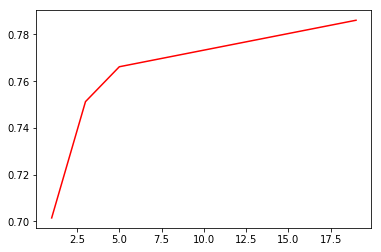

In [90]:
'''
def normalize(word_vec):
    norm=np.linalg.norm(word_vec)
    if norm == 0: 
        return word_vec
    return word_vec/norm
'''

def KNN(x_test, X, K, y):
    instances = X.shape[0]
    similarities = []
    
    for j in range(instances):
        similarities.append(x_test.dot(X[j])/(np.linalg.norm(x_test)*np.linalg.norm(X[j]))) #calculate similarity/distance
    
    similarities, labels = zip(*sorted(zip(similarities, y), reverse=True))#sort the similarities and the labels. We want to get the k most similar or nearest neighbors
    
    neighbors = []
        
    for i in range(K):
        neighbors.append(labels[i])#get the K-Nearest-Neighbors
    
    return(max(set(neighbors), key=neighbors.count))

#return the most common element of a list
def most_common(lst):
    return max(set(lst), key=lst.count) 


#compute the similarities and the k-nearest-neighbors with their labels
def getSimilarities(x_test, X, K, y):
    
    instances = X.shape[0]
    similarities = []
    
    for j in range(instances):
        similarities.append(x_test.dot(X[j])/(np.linalg.norm(x_test)*np.linalg.norm(X[j]))) #calculate similarity/distance
    
    similarities, labels = zip(*sorted(zip(similarities, y), reverse=True))#sort the similarities and the labels. We want to get the k most similar or nearest neighbors
    
    neighbors = []
        
    for i in range(K):
        neighbors.append(labels[i])#get the K-Nearest-Neighbors
    
    return neighbors


predictions = []

K = [1, 3, 5, 19]

accuracy = []

for k in K:    
    predictions = []
    for i in range(X_valid.shape[0]):

        predictions.append(KNN(X_valid[i], X, k, y))

    res = predictions-y_valid
    count = 0
        
    for i in range(y_valid.shape[0]):
        if res[i] == 0:
            count = count + 1

    accuracy.append(count/y_valid.shape[0])

print(accuracy)

plt.plot(K, accuracy, 'r-')


\textbf{3)}  Here we will choose the top T words. As we know, the bag of words is just a matix having messages as columns and the words used as rows. We will choose the top T words that have the highest information gain and appear more than 50 times overall. 

/home/apopappas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/home/apopappas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/home/apopappas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/home/apopappas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/home/apopappas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


[0.43781094527363185, 0.5671641791044776, 0.5422885572139303, 0.5174129353233831, 0.48258706467661694]


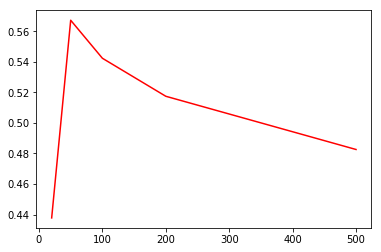

In [105]:
def top_feature_vals(labels, all_cat_examples,n=10,l=25):
    vec = CountVectorizer().fit(all_cat_examples)
    bag_of_words = vec.transform(all_cat_examples)
    #print(bag_of_words.shape)
    sum_words = bag_of_words.sum(axis=0)
    #print(sum_words.shape)

    words_freq = [(word, sum_words[0, idx],idx) for word, idx in     vec.vocabulary_.items()]
    words_freq=sorted(words_freq, key = lambda x: x[1], reverse=True)

    idx=[]
    for i in range(n):
        if(words_freq[i][1] >= l):
            idx.append(words_freq[i][2])
    Bow=[]
    bag_of_words=bag_of_words.toarray()
    Bow = (bag_of_words[:, idx])
    #print(Bow.shape)
    selector = SelectKBest(mutual_info_classif, k=n)
    selectedFeatures = selector.fit_transform(Bow, labels)
    #print("bag of words shape: ",selectedFeatures.shape)
    sum_idx = selectedFeatures.sum(axis=0)
    
    return(selectedFeatures)

T = [20, 50, 100, 200, 500]

accuracy = []

for t in T:
    X_train = top_feature_vals(y, df['messages'],n = t, l = 20)
    X_valid = top_feature_vals(y_valid, validate['messages'].values.astype('U'),n = t, l = 20)
    
    predictions = []

    for i in range(X_valid.shape[0]):
        predictions.append(KNN(X_valid[i], X_train, 3, y))

    res = predictions-y_valid
    count = 0
        
    for i in range(y_valid.shape[0]):
        if res[i] == 0:
            count = count + 1

    accuracy.append(count/y_valid.shape[0])
    
    
    
print(accuracy)
plt.plot(T, accuracy, 'r-')

We see that using the information gain at both the train and test set as a criteria for reducing our features does not affect the KNN algorithm with the cosine similarity measure in a good manner. The accuracy drops steadily as we add up more features with high information gain.

### Problem 4 - Performance Evaluation of classifiers for espam dataset

In this exercise, we will examine the performance of seven different classification algorithms:
\begin{itemize}
    \item \textbf{Decision Tree Algorithm} Cart
    \item \textbf{Multivariable Adaptive Regression Splines}
    \item \textbf{Neural Network} with three hidden nodes 
    \item \textbf{Logistic Regression} 
    \item \textbf{Naive Bayes} 
    \item \textbf{Multiple Regression}
    \item \textbf{kNN Algorithm}
\end{itemize}



In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

knc = KNeighborsClassifier(n_neighbors=19)
knc.fit(X,y)

y_knc = knc.predict(X_valid)

print('KNeighbors Accuracy_score: ',accuracy_score(y_valid,y_knc))

classifier = DecisionTreeClassifier(random_state=1)  
classifier.fit(X, y)

y_pred = classifier.predict(X_valid)  

print('Decision Tree Accuracy_score: ',accuracy_score(y_valid,y_pred))

mlp = MLPClassifier(hidden_layer_sizes=(3), max_iter=1000, random_state=2)  
mlp.fit(X, y.values.ravel())  
predictions = mlp.predict(X_valid)  
print('MLP Neural Net Accuracy_score: ',accuracy_score(y_valid,predictions))

# creating the feature matrix 
matrix = CountVectorizer(max_features=20)
X_reg = matrix.fit_transform(df['messages']).toarray()

y_reg = df.iloc[:, 0]

# creating the feature matrix 
matrix = CountVectorizer(max_features=20)
X_valid_reg = matrix.fit_transform(validate['messages'].values.astype('U')).toarray()

y_valid_reg = validate.iloc[:, 0]

logreg = LogisticRegression(solver="lbfgs", random_state=1)
logreg.fit(X_reg,y_reg)
y_pred = logreg.predict(X_valid_reg)
print('Logistic Regression Accuracy_score: ',accuracy_score(y_valid,y_pred))

gnb = GaussianNB()
gnb.fit(X,y)
y_pred = gnb.predict(X_valid)
print('Naive Bayes(Gaussian) ',accuracy_score(y_valid,y_pred))

bnb = BernoulliNB()
bnb.fit(X,y)
y_pred = bnb.predict(X_valid)
print('Naive Bayes(Bernoulli) ',accuracy_score(y_valid,y_pred))

mnb = MultinomialNB()
mnb.fit(X,y)
y_pred = mnb.predict(X_valid)
print('Naive Bayes(Multinomial) ',accuracy_score(y_valid,y_pred))


KNeighbors Accuracy_score:  0.6965174129353234
Decision Tree Accuracy_score:  0.5124378109452736
MLP Neural Net Accuracy_score:  0.7412935323383084
Logistic Regression Accuracy_score:  0.8706467661691543
Naive Bayes(Gaussian)  0.6019900497512438
Naive Bayes(Bernoulli)  0.527363184079602
Naive Bayes(Multinomial)  0.6666666666666666


In [29]:
from pyearth import Earth

mars_model = Earth(max_degree=1)
mars_model.fit(X,y)
y_pred = mars_model.predict(X_valid).astype(int)
print('MARS ',accuracy_score(y_valid,y_pred))

C:\Users\Admin\.conda\envs\ml\lib\site-packages\pyearth\earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()


MARS  0.4626865671641791


C:\Users\Admin\.conda\envs\ml\lib\site-packages\pyearth\earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


We see that Logistic regression using the twenty strongest variables has the highest accuracy of all used methods. A somewhat naive Neural Network model also has a very good accuracy while Naive Bayes as implemented in the sklearn library performed much worse than the "custom-made" Naive Bayes algorithm, since it assumes a distribution followed by the training set.